Index(['Unnamed: 0', 'kahu', 'discharge', '3day_kahu', '3day_arki', 'arki'], dtype='object')
<class 'pandas.core.series.Series'>
DatetimeIndex: 545 entries, 2015-07-01 to 2014-09-04
Series name: discharge
Non-Null Count  Dtype  
--------------  -----  
545 non-null    float64
dtypes: float64(1)
memory usage: 8.5 KB
None
             kahu   3day_kahu   3day_arki        arki
count  545.000000  545.000000  545.000000  545.000000
mean     6.404037    6.419144    8.824679    8.801560
std     14.358619    9.353073   18.382242   25.243257
min      0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.566667    0.000000    0.000000
50%      0.000000    3.066667    2.400000    0.000000
75%      5.500000    8.700000   10.200000    5.400000
max    138.000000   65.100000  170.866667  272.200000
count    545.000000
mean      17.757264
std       24.437215
min        0.368000
25%        4.474062
50%        9.514461
75%       20.246546
max      178.856556
Name: discharge, dtype: float64


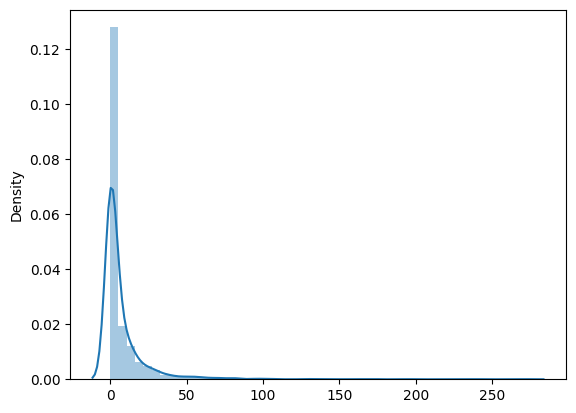

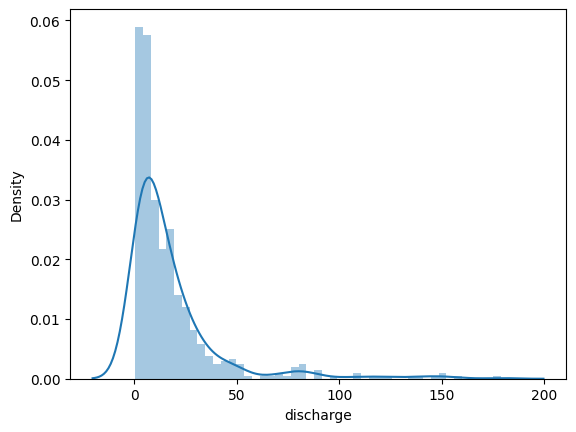

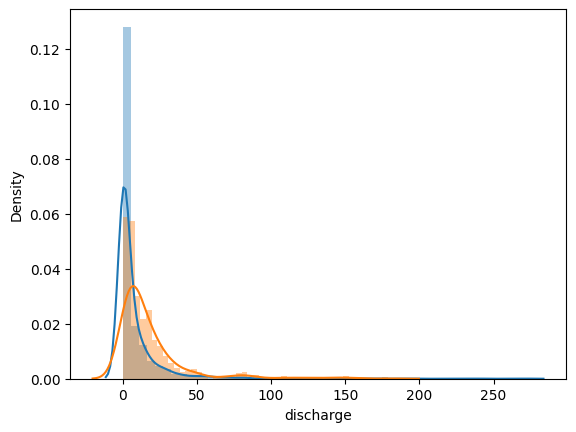

<Figure size 640x480 with 0 Axes>

In [23]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
Q=pd.read_csv(r"D:\Dekstop\Dekstop folders\Data Science\python course\major project part 2\data3_new.csv",parse_dates=["date"],index_col="date").loc[:,"discharge"]
RF=pd.read_csv(r"D:\Dekstop\Dekstop folders\Data Science\python course\major project part 2\data3_new.csv",parse_dates=["date"],index_col="date")
print(RF.columns)
RF.drop("Unnamed: 0",axis=1,inplace=True)
RF.drop("discharge",axis=1,inplace=True)
#RF.drop(["rainfall"],axis=1,inplace=True)
print(Q.info())
print(RF.describe())

#Q=pd.Series(np.log(Q))

print(Q.describe())
import seaborn as sns

sns.distplot(RF)
plt.show()
plt.clf()
sns.distplot(Q)
plt.show()
plt.clf()

sns.distplot(RF)

sns.distplot(Q)
plt.show()
plt.clf()





In [24]:
'''x_train=RF.loc[RF.index<"2017-01-01",:]
print(x_train.shape)
x_val=RF.loc[np.logical_and(RF.index<"2018-01-01",RF.index>"2017-01-01"),:]
print(x_val.shape)
x_test=RF.loc[RF.index>"2018-01-01",:]
print(x_test.shape)


y_train=Q[x_train.index]
print(y_train.shape)
y_val=Q[x_val.index]
print(y_val.shape)
y_test=Q[x_test.index]
print(y_test.shape)'''

'x_train=RF.loc[RF.index<"2017-01-01",:]\nprint(x_train.shape)\nx_val=RF.loc[np.logical_and(RF.index<"2018-01-01",RF.index>"2017-01-01"),:]\nprint(x_val.shape)\nx_test=RF.loc[RF.index>"2018-01-01",:]\nprint(x_test.shape)\n\n\ny_train=Q[x_train.index]\nprint(y_train.shape)\ny_val=Q[x_val.index]\nprint(y_val.shape)\ny_test=Q[x_test.index]\nprint(y_test.shape)'

In [25]:
df=pd.concat([RF,Q],axis=1)
df
df=df.sample(frac=1)
RF=df.drop(["discharge"], axis =1)
Q=df["discharge"]

In [26]:
from random import randint
a=randint(0,100000)
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split


#x_train, y_train, x_val, y_val, x_test, y_test = train_valid_test_split(df, target="discharge",train_size=0.6,valid_size=0.2, test_size=0.2
 #                                                                    ,random_state=3138  )
x_train, x_test, y_train,y_test = train_test_split(RF,Q, test_size=0.000001,random_state=3138)
a
  # random_state= 45075


53951

count    1.000000
mean     9.996889
std           NaN
min      9.996889
25%      9.996889
50%      9.996889
75%      9.996889
max      9.996889
Name: discharge, dtype: float64


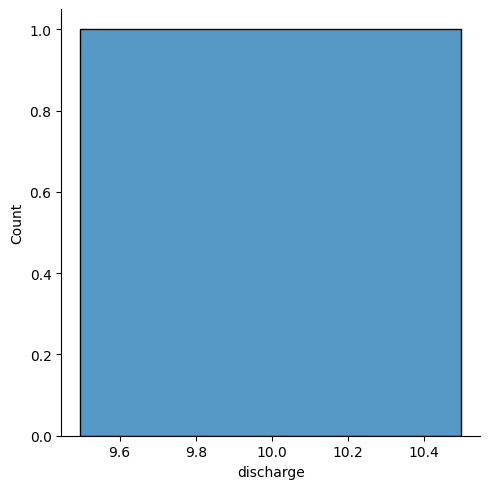

<Figure size 640x480 with 0 Axes>

In [27]:
print(y_test.describe())

sns.displot(y_test)
plt.show()
plt.clf()


In [28]:

try:
    print(y_val.describe())

    sns.displot(y_val)
    plt.show()
    plt.clf()
except:
    pass

count    544.000000
mean      17.771530
std       24.457435
min        0.368000
25%        4.465359
50%        9.500302
75%       20.329687
max      178.856556
Name: discharge, dtype: float64


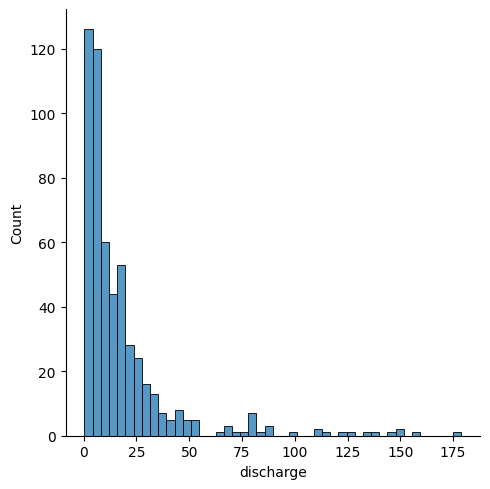

<Figure size 640x480 with 0 Axes>

In [29]:
print(y_train.describe())

sns.displot(y_train)
plt.show()
plt.clf()


In [30]:
from scipy.stats import ks_2samp,kstest

# training and validation
from scipy import stats
print(kstest(y_train,y_test))


KstestResult(statistic=0.5110294117647058, pvalue=0.9798165137614679)


In [31]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
scaler.fit(x_train,y_train)
x_test=scaler.transform(x_test).reshape(x_test.shape[0],1,x_test.shape[1])
#y_train=scaler.transform(y_train)
x_train=scaler.transform(x_train).reshape(x_train.shape[0],1,x_train.shape[1])
#x_val=scaler.transform(x_val)

In [32]:
import tensorflow
from keras import regularizers
l2_reg = regularizers.L1L2(l1=0.05,l2=0.69)

from sklearn.model_selection import cross_val_score,KFold,GridSearchCV

def create_model():
    model=keras.Sequential([keras.layers.Dropout(0.3),
                    keras.layers.LSTM(12,input_shape=(1,4)),
            #                keras.layers.Dense(17,activation="tanh"),keras.layers.Dropout(0.4),
                   # keras.layers.Dense(5,activation="tanh",kernel_regularizer=l2_reg),keras.layers.Dropout(0.3),
                    #keras.layers.Dense(4,activation="tanh",kernel_regularizer=l2_reg),keras.layers.Dropout(0.3),
                    keras.layers.Dense(1,activation="relu")])
    # Create the optimizer with the initial learning rate

    from keras.optimizers import Adam,SGD
    opt = Adam(learning_rate=0.01)

    model.compile(optimizer=opt,loss="mean_squared_error")

    return model


In [33]:
from scikeras.wrappers import KerasRegressor
model=model=KerasRegressor(model=create_model,batch_size=70,epochs=800)
#score=cross_val_score(model,x_train.reshape(-1,1),y_train.reshape(-1,1),scoring="neg_mean_squared_error",cv=3)



#batch_size = [10]
#epochs = [400,500,600,700,800]
#param_grid = dict(batch_size=batch_size, epochs=epochs)

#optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#param_grid = dict(optimizer=optimizer)
#param_grid = dict(optimizer__learning_rate= [0.01, 0.1, 1])
##grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3,scoring="neg_mean_squared_error")
#grid_result = grid.fit(x_train,y_train)
# summarize results
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))




r2=cross_val_score(model,x_train,y_train,scoring="r2",cv=5)
n=x_train.shape[0]*(0.2)
p=x_train.shape[1]
Adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)



print("the mean cross validation r2 is : ",r2.mean())

print(r2,"\n\n", Adj_r2,"\n\n the mean cross validation adj r2 is : ",Adj_r2.mean())

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Dekstop\Dekstop folders\Data Science\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Dekstop\Dekstop folders\Data Science\venv\lib\site-packages\scikeras\wrappers.py", line 762, in fit
    self._fit(
  File "d:\Dekstop\Dekstop folders\Data Science\venv\lib\site-packages\scikeras\wrappers.py", line 929, in _fit
    self._check_model_compatibility(y)
  File "d:\Dekstop\Dekstop folders\Data Science\venv\lib\site-packages\scikeras\wrappers.py", line 551, in _check_model_compatibility
    if self.n_outputs_expected_ != len(self.model_.outputs):
TypeError: object of type 'NoneType' has no len()


In [ ]:

model=keras.Sequential([keras.layers.Flatten(input_shape=(3,),)
#                keras.layers.Dense(17,activation="tanh"),keras.layers.Dropout(0.4),
                keras.layers.Dense(10,activation="tanh",kernel_regularizer=l2_reg),keras.layers.Dropout(0.3),
                keras.layers.Dense(9,activation="tanh",kernel_regularizer=l2_reg),keras.layers.Dropout(0.3),
#                keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#               keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#                keras.layers.Dense(6,activation="tanh"),keras.layers.Dropout(0.3),
#               keras.layers.Dense(5,activation="tanh"),keras.layers.Dropout(0.3),
#              keras.layers.Dense(4,activation="tanh"),keras.layers.Dropout(0.3),
#                keras.layers.Dense(3,activation="tanh"),keras.layers.Dropout(0.3),
#                keras.layers.Dense(2,activation="tanh"),keras.layers.Dropout(0.3),
                keras.layers.Dense(1,activation="relu")])
# Create the optimizer with the initial learning rate

from keras.optimizers import Adam,SGD
opt = Adam(learning_rate=0.01)

model.compile(optimizer=opt,loss="mean_squared_error")
from keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=300)
callbacks = [es,
             ModelCheckpoint(filepath='best_model3.h5', monitor='val_loss', save_best_only=True)]

model.fit(x_train,y_train,batch_size=30,epochs=3000,validation_data=(x_test, y_test),callbacks=callbacks)

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

##  mse
#y_train=np.exp(y_train)
#y_test=np.exp(y_test)
print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))

##
y_pred_training=model.predict(x_train).reshape(-1,1)
y_pred=model.predict(x_test).reshape(-1,1)

#y_pred_training=np.exp(y_pred_training)
#y_pred=np.exp(y_pred)

##### ## train ######
## mae

error=mean_absolute_error(y_train,y_pred_training)
print(error)

##r2
score=r2_score(y_train,y_pred_training)
n=x_test.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")
 
####### testing
print("now testing data: \n")
error=mean_squared_error(y_test,y_pred)
print(error)
error=mean_absolute_error(y_test,y_pred)
print(error)
score=r2_score(y_test,y_pred)
n=x_test.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")

arr=[]
for a in y_pred:
    for b in a:
        arr.append(b)

y_pred=arr


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2500852275.py, line 1)

In [ ]:
from keras.models import load_model
model=load_model(r"D:\Dekstop\Dekstop folders\Data Science\python course\practice\best_model3.h5")

print(model.evaluate(x_train,y_train))
print(model.evaluate(x_test,y_test))

##
y_pred_training=model.predict(x_train).reShape(-1,1)
y_pred=model.predict(x_test).reshape(-1,1)

#y_pred_training=np.exp(y_pred_training)
#y_pred=np.exp(y_pred)

##### ## train ######
## mae

error=mean_absolute_error(y_train,y_pred_training)
print(error)

##r2
score=r2_score(y_train,y_pred_training)
n=x_test.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")
 
####### testing
print("now testing data: \n")
error=mean_squared_error(y_test,y_pred)
print(error)
error=mean_absolute_error(y_test,y_pred)
print(error)
score=r2_score(y_test,y_pred)
n=x_test.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")

arr=[]
for a in y_pred:
    for b in a:
        arr.append(b)

y_pred=arr

In [ ]:
df=pd.DataFrame({"actual":y_test.tolist(),"predicted":y_pred})
pd.set_option("display.max_rows",700)
print(df)
pd.set_option("display.max_rows",20)

In [ ]:
print("now validation data: \n")
#y_train=np.log(y_train)
#y_test=np.log(y_test)
#model.fit(np.concatenate([np.array(x_train),np.array(x_test)],axis=0),np.concatenate([np.array(y_train),np.array(y_test)],axis=0),batch_size=20,epochs=epochs)

y_pred=model.predict(x_val).reshape(-1,1)
#y_pred=np.exp(y_pred)
#y_val=np.exp(y_val)

error=mean_squared_error(y_val,y_pred)

print(error)
error=mean_absolute_error(y_val,y_pred)
print(error)
score=r2_score(y_val,y_pred)
n=x_val.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-score) * (n-1)/(n-p-1))
print("r2 score: " ,score,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")

arr=[]
for a in y_pred:
    for b in a:
        arr.append(b)

y_pred=arr

In [ ]:
df=pd.DataFrame({"actual":y_val.tolist(),"predicted":y_pred})
pd.set_option("display.max_rows",700)
print(df)
pd.set_option("display.max_rows",20)

In [ ]:
from xgboost import XGBRegressor
regressor=XGBRegressor(max_depth=2,min_child_weight=3,gamma=1,colsample_bytree=0.5)

regressor.fit(x_train,y_train)
#y_train=np.exp(y_train)
#y_test=np.exp(y_test)
print(regressor.score(x_train,y_train))
r2=regressor.score(x_test,y_test)

n=x_test.shape[0]
p=x_train.shape[1]
adjusted_r2=1- ((1-r2) * (n-1)/(n-p-1))
print("r2 score: " ,r2,"\n")
print("adjusted r2 score: " ,adjusted_r2,"\n")
from sklearn.metrics import mean_squared_error,mean_absolute_error

y_pred1=regressor.predict(x_train).reshape(-1,1)
y_pred=regressor.predict(x_test).reshape(-1,1)
#y_pred1=np.exp(y_pred1)
#y_pred=np.exp(y_pred)


print(mean_absolute_error(y_train,y_pred1))
print(mean_absolute_error(y_test,y_pred))
arr=[]
for a in y_pred:
    for b in a:
        arr.append(b)

y_pred=arr